In [7]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
import numpy as np

In [8]:
def createDataContainer(dz, dep=0):
    data = ert.DataContainer()
    for i in range(4):
        data.createSensor([0, 0, dep+(i-1.5)*dz])
    
    data.createFourPointData(0, 0, 3, 1, 2)
    data["k"] = ert.geometricFactors(data)
    return data

In [9]:
radius = 0.2
height = 0.3
elDist = 0.025
fullDC = createDataContainer(elDist, -20)
print(fullDC["k"])
halfDC = createDataContainer(elDist, -height/2)
print(halfDC["k"])


1 [0.3141592648988333]
1 [0.31303347065930526]


In [20]:
def createBucket(scheme, radius, height, **kwargs):
    bucket = mt.createCylinder(radius=radius, height=height, 
                               nSegments=kwargs.pop("nSegments", 16))
    bucket.translate([0, 0, -height/2])
    elDist = scheme.sensor(0).distance(scheme.sensor(1))
    for sensor in scheme.sensors():
        bucket.createNode(sensor, -99)
        
        bucket.createNode(sensor-pg.Pos(0, 0, elDist*kwargs.pop("dx", 0.1)))

    mesh = mt.createMesh(bucket, quality=1.2)
    return mesh

In [21]:
rads = np.arange(0.05, 0.4, 0.03)
kVec = []
for rad in rads:
    mesh = createBucket(halfDC, radius=rad, height=height)
    kNum = ert.createGeometricFactors(halfDC, numerical=True, mesh=mesh, p2=True)
    kVec.append(kNum)

19/06/23 - 19:09:51 - pyGIMLi - INFO - Save RVector binary
19/06/23 - 19:09:51 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\17350995809830921907
19/06/23 - 19:09:53 - pyGIMLi - INFO - Save RVector binary
19/06/23 - 19:09:53 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\10504382714188239416
19/06/23 - 19:09:54 - pyGIMLi - INFO - Save RVector binary
19/06/23 - 19:09:54 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\12852813608386537015
19/06/23 - 19:09:56 - pyGIMLi - INFO - Save RVector binary
19/06/23 - 19:09:56 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\18155213439264085202
19/06/23 - 19:09:57 - pyGIMLi - INFO - Save RVector binary
19/06/23 - 19:09:57 - pyGIMLi - INFO - Cache stored: C:\Guenther.T\Anwendungsdaten\pygimli\Cache\12086026027174913374
19/06/23 - 19:09:57 - pyGIMLi - INFO - Cache c:\Guenther.T\src\gimli\gimli\pygimli\physics\ert\ert.py:createGeometr

(<Axes: >, None)

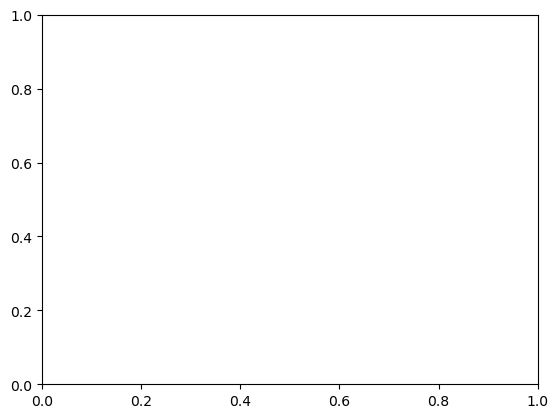

In [19]:
pg.show(mesh, style="wireframe")

Text(0, 0.5, 'geometric effect (-)')

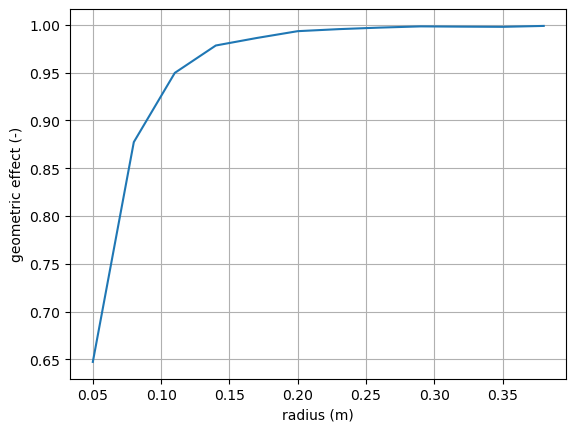

In [24]:
pg.plt.plot(rads, np.array(kVec) / halfDC["k"])
pg.plt.grid(True)
pg.plt.xlabel("radius (m)")
pg.plt.ylabel("geometric effect (-)")
